In [1]:
# Paquetes utilizados en el análisis:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Datos utilizados en el análisis:
fecha = pd.date_range(start='2001-12-01', end='2021-02-01', freq='MS')
ipeco = pd.DataFrame(index=fecha)
data = pd.read_csv('https://raw.githubusercontent.com/percepcioneseconomicas/indices/main/CEEN%20UDD%20IPECO.csv', parse_dates=True, dayfirst=True, index_col='Fecha')
data.columns = ['ipeco', 'coyuntura', 'expectativas', 'sea', 'da', 'sef', 'df', 'iif', 'ipecotm']
data

,ipeco,coyuntura,expectativas,sea,da,sef,df,iif,ipecotm
Fecha,,,,,,,,,
2001-12-01,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN
2002-03-01,102.154837,98.573133,103.698719,102.302944,93.434467,100.318846,100.436180,109.139658,NaN
2002-06-01,108.159048,86.222434,116.394313,105.320513,48.783031,113.796170,128.505682,111.210817,103.437962
2002-09-01,101.676268,106.014345,100.337931,113.553114,93.149319,109.550052,80.432108,103.957999,103.996718
2002-12-01,100.376198,84.324335,106.452329,86.190918,82.683104,106.643645,113.492883,101.752065,103.403838
...,...,...,...,...,...,...,...,...,...
2020-10-01,76.311290,58.099439,83.116438,53.540587,69.128497,79.919551,102.831197,73.655349,74.163502
2020-11-01,79.008002,68.376084,83.062052,61.439366,84.625324,84.316935,94.527110,74.472780,75.509045
2020-12-01,66.987987,65.118686,67.825989,58.740526,80.119287,66.010929,82.430523,60.268885,74.102427


In [3]:
# Valores iniciales del Ipeco:
ipeco0 = 0.564465028
coyuntura0 = 0.375772273
expectativas0 = 0.688636166
sea0 = 0.503225806
da0 = 0.241887388
sef0 = 0.778145695
df0 = 0.502857143
iif0 = 0.78490566

data['ipeco'] = data['ipeco']*ipeco0
data['coyuntura'] = data['coyuntura']*coyuntura0
data['expectativas'] = data['expectativas']*expectativas0
data['sea'] = data['sea']*sea0
data['da'] = data['da']*da0
data['sef'] = data['sef']*sef0
data['df'] = data['df']*df0
data['iif'] = data['iif']*iif0
data = data.drop('ipecotm', axis=1)
data.head()


,ipeco,coyuntura,expectativas,sea,da,sef,df,iif
Fecha,,,,,,,,
2001-12-01,56.446503,37.577227,68.863617,50.322581,24.188739,77.814569,50.285714,78.490566
2002-03-01,57.662833,37.041050,71.410688,51.481481,22.600619,78.062678,50.505051,85.664336
2002-06-01,61.052000,32.400000,80.153333,53.000000,11.800000,88.550000,64.620000,87.290000
2002-09-01,57.392697,39.837251,69.096328,57.142857,22.531646,85.245902,40.445860,81.597222
2002-12-01,56.658853,31.686747,73.306924,43.373494,20.000000,82.984293,57.070707,79.865772


In [4]:
data = ipeco.merge(data, how='left', left_index=True, right_index=True)
data = data.interpolate(method='linear')
data

,ipeco,coyuntura,expectativas,sea,da,sef,df,iif
2001-12-01,56.446503,37.577227,68.863617,50.322581,24.188739,77.814569,50.285714,78.490566
2002-01-01,56.851946,37.398502,69.712640,50.708881,23.659366,77.897272,50.358826,80.881823
2002-02-01,57.257390,37.219776,70.561664,51.095181,23.129992,77.979975,50.431938,83.273079
2002-03-01,57.662833,37.041050,71.410688,51.481481,22.600619,78.062678,50.505051,85.664336
2002-04-01,58.792555,35.494034,74.324903,51.987654,19.000413,81.558452,55.210034,86.206224
...,...,...,...,...,...,...,...,...
2020-10-01,43.075055,21.832158,57.236985,26.943005,16.721311,62.189055,51.709402,57.812500
2020-11-01,44.597254,25.693837,57.199533,30.917874,20.469799,65.610860,47.533632,58.454106
2020-12-01,37.812376,24.469797,46.707429,29.559748,19.379845,51.366120,41.450777,47.305389
2021-01-01,40.044255,26.743354,48.911522,28.333333,25.153374,61.111111,38.255034,47.368421


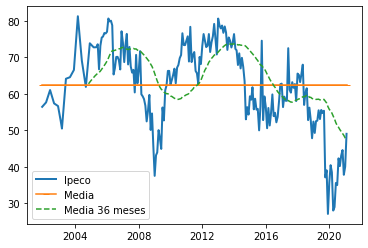

In [5]:
data['ipeco36'] = data['ipeco'].rolling(36).mean()
data['ipeco_media'] = data['ipeco'].mean()

plt.plot(data['ipeco'], label='Ipeco', lw=2)
plt.plot(data['ipeco_media'], label='Media', marker='_')
plt.plot(data['ipeco36'], label='Media 36 meses', ls='--')
plt.legend()
plt.show()

In [6]:
data['trend'] = list(range(data.shape[0]))


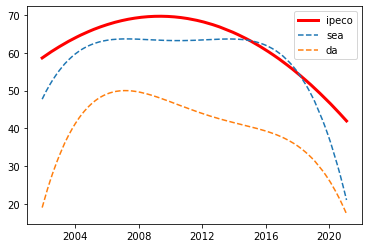

In [7]:
x = data['trend']
y = data['ipeco']
p = 4

a = np.polyfit(x, y, 2)
b = np.poly1d(a)
plt.plot(data.index, b(x),"r", label='ipeco', lw=3)

for e in ['sea', 'da']:
    c = np.polyfit(x, data[e], p)
    d = np.poly1d(c)
    plt.plot(data.index, d(x), label=e, ls='--')

plt.legend()

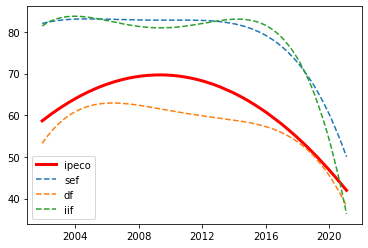

In [8]:
x = data['trend']
y = data['ipeco']
p = 4

a = np.polyfit(x, y, 2)
b = np.poly1d(a)
plt.plot(data.index, b(x),"r", label='ipeco', lw=3)

for e in ['sef', 'df', 'iif']:
    c = np.polyfit(x, data[e], p)
    d = np.poly1d(c)
    plt.plot(data.index, d(x), label=e, ls='--')

plt.legend()

In [9]:
rdata = data['2014-01-01':]

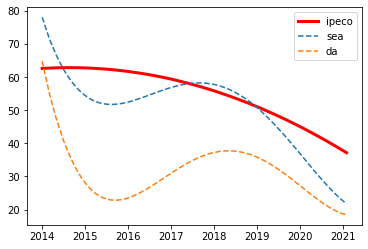

In [10]:
x = rdata['trend']
y = rdata['ipeco']
p = 4

a = np.polyfit(x, y, 2)
b = np.poly1d(a)
plt.plot(rdata.index, b(x),"r", label='ipeco', lw=3)

for e in ['sea', 'da']:
    c = np.polyfit(x, rdata[e], p)
    d = np.poly1d(c)
    plt.plot(rdata.index, d(x), label=e, ls='--')

plt.legend()

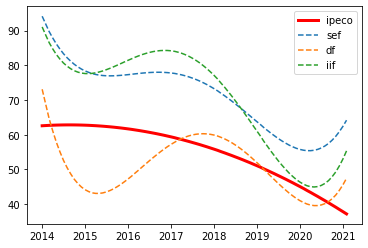

In [11]:
x = rdata['trend']
y = rdata['ipeco']
p = 4

a = np.polyfit(x, y, 2)
b = np.poly1d(a)
plt.plot(rdata.index, b(x),"r", label='ipeco', lw=3)

for e in ['sef', 'df', 'iif']:
    c = np.polyfit(x, rdata[e], p)
    d = np.poly1d(c)
    plt.plot(rdata.index, d(x), label=e, ls='--')

plt.legend()

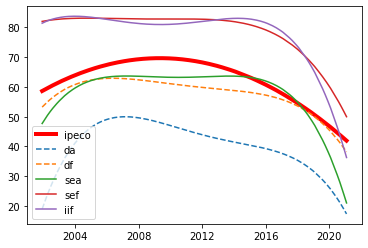

In [12]:
x = data['trend']
y = data['ipeco']
p = 4

a = np.polyfit(x, y, 2)
b = np.poly1d(a)
plt.plot(data.index, b(x),"r", label='ipeco', lw=4)

for e in ['da', 'df']:
    c = np.polyfit(x, data[e], p)
    d = np.poly1d(c)
    plt.plot(data.index, d(x), label=e, ls='--')

for e in ['sea', 'sef', 'iif']:
    c = np.polyfit(x, data[e], p)
    d = np.poly1d(c)
    plt.plot(data.index, d(x), label=e, ls='-')

plt.legend()

In [13]:
data['personal'] = data[['sea', 'sef', 'iif']].mean(axis=1)
data['general'] = data[['da', 'df']].mean(axis=1)

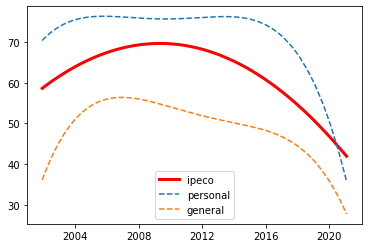

In [14]:
x = data['trend']
y = data['ipeco']
p = 4

a = np.polyfit(x, y, 2)
b = np.poly1d(a)
plt.plot(data.index, b(x),"r", label='ipeco', lw=3)

for e in ['personal', 'general']:
    c = np.polyfit(x, data[e], p)
    d = np.poly1d(c)
    plt.plot(data.index, d(x), label=e, ls='--')

plt.legend()